In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
import pandas as pd 
import numpy as np 
import seaborn as sns
import random 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, KFold
from sklearn import preprocessing

tfk = tf.keras
tfkl = tf.keras.layers

Num GPUs Available:  1


In [2]:
BATCH_SIZE = 32
SHAPE = (4096, 23)
BLOCK_SHAPE = (64, 23)
EPOCHS = 30
VARIABLES = 23
NFOLD = 5 
STEPS_PER_EPOCH = 200
ID = 28

In [3]:
if ID == 28:
    file='D:/Document/DSCI-601/NGAFID/NGAFID_MC_C28.csv'
elif ID == 37:
    file='D:/Document/DSCI-601/NGAFID/NGAFID_MC_C37.csv'
else:
    print('Invalid ID')
df_test = pd.read_csv(file, nrows=100)
float_cols = [c for c in df_test if df_test[c].dtype == "float64"]
float32_cols = {c: np.float16 for c in float_cols}

df = pd.read_csv(file, dtype=float32_cols, engine='c')
df['id'] = df.id.astype('int32')
df = df.dropna()

In [4]:
sources = df[['id', 'plane_id', 'split', 'date_diff', 'before_after']].drop_duplicates()
sources.loc[: , ['split', 'before_after', 'id']].groupby(['split', 'before_after']).count()

id
split before_after     
0     0             589
      1             484
1     0             555
      1             449
2     0             641
      1             552
3     0             343
      1             282
4     0             456
      1             382

In [5]:
df_visual= df.head(100000).drop(['id','plane_id','split','date_diff','before_after'],axis=1)

<AxesSubplot:>

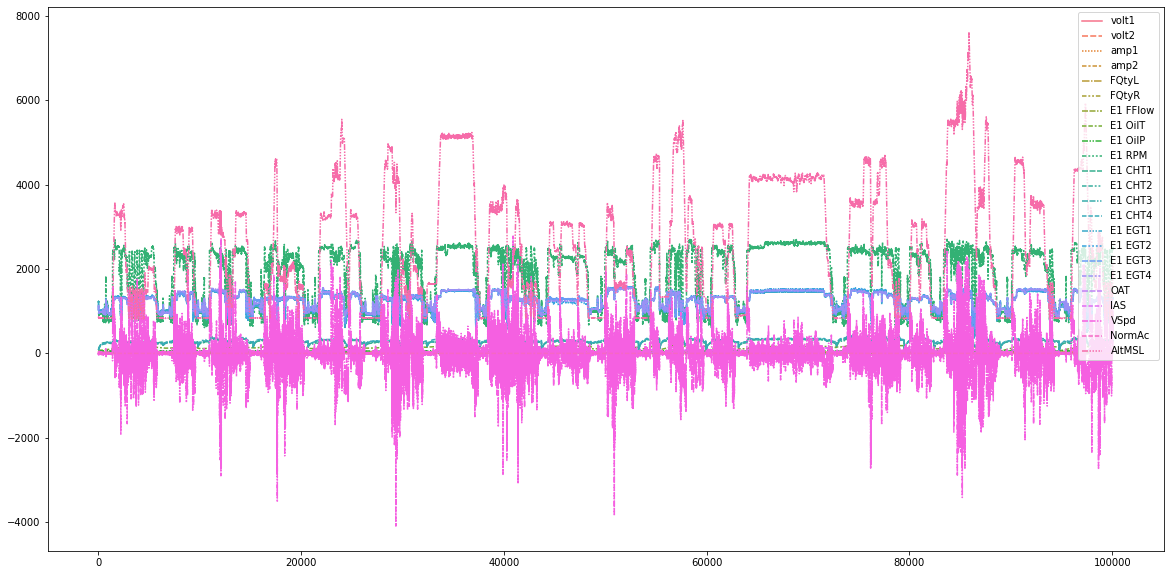

In [6]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df_visual)

In [7]:
input_columns = ['volt1',
 'volt2',
 'amp1',
 'amp2',
 'FQtyL',
 'FQtyR',
 'E1 FFlow',
 'E1 OilT',
 'E1 OilP',
 'E1 RPM',
 'E1 CHT1',
 'E1 CHT2',
 'E1 CHT3',
 'E1 CHT4',
 'E1 EGT1',
 'E1 EGT2',
 'E1 EGT3',
 'E1 EGT4',
 'OAT',
 'IAS',
 'VSpd',
 'NormAc',
 'AltMSL']

array([[<AxesSubplot:title={'center':'volt1'}>,
        <AxesSubplot:title={'center':'volt2'}>,
        <AxesSubplot:title={'center':'amp1'}>,
        <AxesSubplot:title={'center':'amp2'}>,
        <AxesSubplot:title={'center':'FQtyL'}>],
       [<AxesSubplot:title={'center':'FQtyR'}>,
        <AxesSubplot:title={'center':'E1 FFlow'}>,
        <AxesSubplot:title={'center':'E1 OilT'}>,
        <AxesSubplot:title={'center':'E1 OilP'}>,
        <AxesSubplot:title={'center':'E1 RPM'}>],
       [<AxesSubplot:title={'center':'E1 CHT1'}>,
        <AxesSubplot:title={'center':'E1 CHT2'}>,
        <AxesSubplot:title={'center':'E1 CHT3'}>,
        <AxesSubplot:title={'center':'E1 CHT4'}>,
        <AxesSubplot:title={'center':'E1 EGT1'}>],
       [<AxesSubplot:title={'center':'E1 EGT2'}>,
        <AxesSubplot:title={'center':'E1 EGT3'}>,
        <AxesSubplot:title={'center':'E1 EGT4'}>,
        <AxesSubplot:title={'center':'OAT'}>,
        <AxesSubplot:title={'center':'IAS'}>],
       [<AxesSubpl

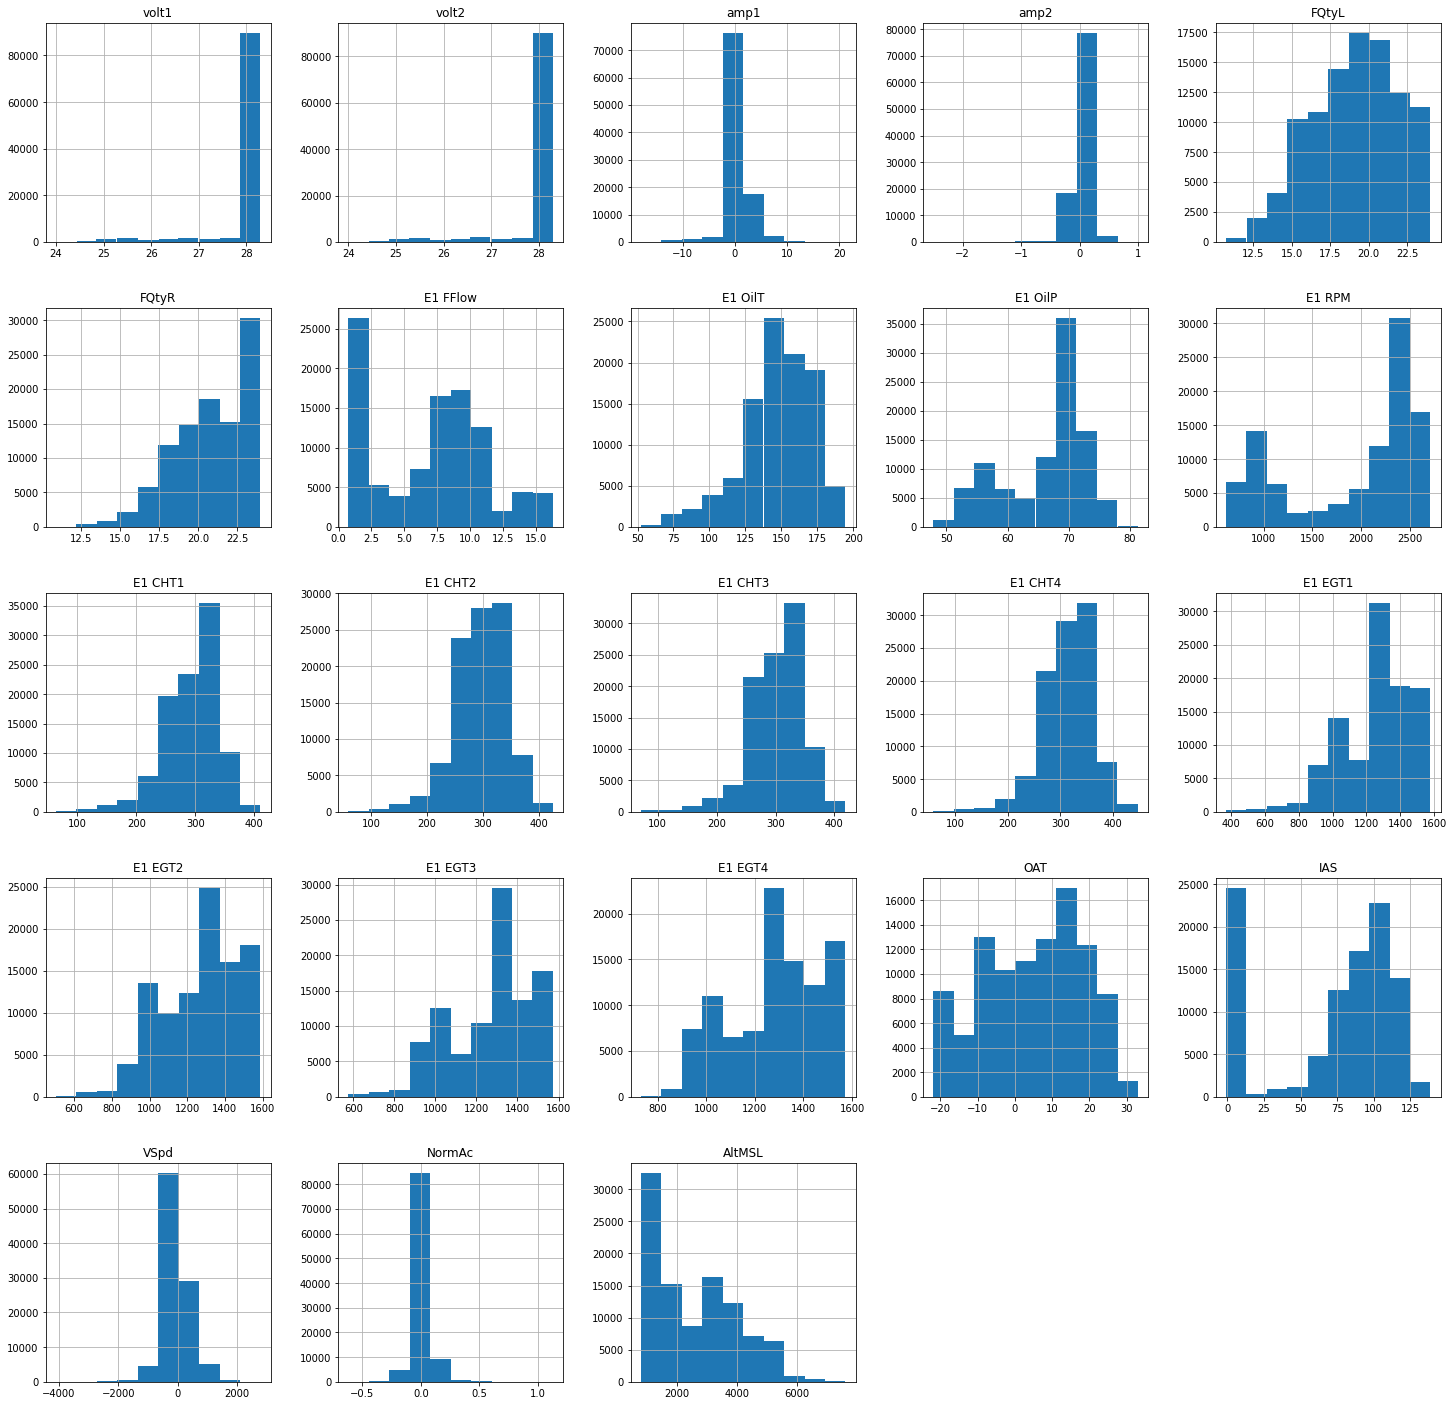

In [8]:
df_visual.hist(figsize = (25,25),column=input_columns)

In [9]:
df_visual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 100076
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   volt1     100000 non-null  float16
 1   volt2     100000 non-null  float16
 2   amp1      100000 non-null  float16
 3   amp2      100000 non-null  float16
 4   FQtyL     100000 non-null  float16
 5   FQtyR     100000 non-null  float16
 6   E1 FFlow  100000 non-null  float16
 7   E1 OilT   100000 non-null  float16
 8   E1 OilP   100000 non-null  float16
 9   E1 RPM    100000 non-null  float16
 10  E1 CHT1   100000 non-null  float16
 11  E1 CHT2   100000 non-null  float16
 12  E1 CHT3   100000 non-null  float16
 13  E1 CHT4   100000 non-null  float16
 14  E1 EGT1   100000 non-null  float16
 15  E1 EGT2   100000 non-null  float16
 16  E1 EGT3   100000 non-null  float16
 17  E1 EGT4   100000 non-null  float16
 18  OAT       100000 non-null  float16
 19  IAS       100000 non-null  float16
 20  VSpd

In [10]:
df_visual.head(10)

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,E1 CHT4,E1 EGT1,E1 EGT2,E1 EGT3,E1 EGT4,OAT,IAS,VSpd,NormAc,AltMSL
0,28.09375,28.09375,6.398438,0.399902,20.218750,23.84375,2.539062,74.2500,67.5000,1229.0,...,81.9375,1108.0,1006.0,1022.0,1035.0,-2.199219,0.0,13.210938,-0.029999,838.0
1,28.09375,28.09375,6.398438,0.399902,20.218750,23.84375,2.539062,74.2500,67.5000,1229.0,...,81.9375,1108.0,1006.0,1022.0,1035.0,-2.199219,0.0,13.210938,-0.029999,838.0
2,28.09375,28.09375,6.398438,0.500000,20.265625,23.84375,2.470703,74.2500,67.4375,1226.0,...,82.5000,1116.0,1011.0,1028.0,1044.0,-2.199219,0.0,11.148438,-0.029999,839.0
4,28.09375,28.09375,6.199219,0.399902,20.218750,23.84375,2.380859,74.2500,67.5000,1230.0,...,83.7500,1137.0,1022.5,1044.0,1060.0,-2.500000,0.0,-22.515625,-0.020004,841.0
5,28.09375,28.09375,6.300781,0.399902,20.156250,23.81250,2.300781,74.3125,67.5000,1227.0,...,84.3125,1147.0,1029.0,1053.0,1069.0,-2.500000,0.0,-13.546875,-0.010002,841.5
6,28.09375,28.09375,6.199219,0.399902,20.218750,23.81250,2.279297,74.3125,67.3750,1224.0,...,84.8750,1160.0,1037.0,1062.0,1081.0,-2.500000,0.0,1.690430,-0.010002,842.0
7,28.09375,28.09375,6.199219,0.399902,20.156250,23.81250,2.119141,74.3125,67.2500,1218.0,...,85.6250,1174.0,1045.0,1071.0,1095.0,-2.800781,0.0,10.656250,0.010002,861.0
8,28.09375,28.09375,6.101562,0.399902,20.156250,23.78125,2.160156,74.3125,67.1875,1214.0,...,86.2500,1190.0,1055.0,1083.0,1113.0,-2.800781,0.0,0.830078,-0.010002,863.0
9,28.09375,28.09375,6.101562,0.399902,20.218750,23.78125,2.179688,74.3125,67.0625,1206.0,...,86.8125,1204.0,1066.0,1095.0,1130.0,-2.800781,0.0,-8.281250,-0.010002,862.0
10,28.09375,28.09375,6.000000,0.399902,20.218750,23.78125,2.220703,74.3125,67.0625,1207.0,...,87.5625,1218.0,1076.0,1106.0,1144.0,-3.000000,0.0,12.976562,0.010002,862.0


In [11]:
df_visual.describe()

,volt1,volt2,amp1,amp2,FQtyL,FQtyR,E1 FFlow,E1 OilT,E1 OilP,E1 RPM,...,E1 CHT4,E1 EGT1,E1 EGT2,E1 EGT3,E1 EGT4,OAT,IAS,VSpd,NormAc,AltMSL
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.0000,100000.0,...,100000.00000,100000.00,100000.00,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000
mean,NaN,NaN,NaN,-0.005852,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005856,NaN
std,0.000000,0.000000,0.000000,0.119568,0.000000,0.000000,0.000000,0.00000,0.0000,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.075134,NaN
min,24.000000,24.000000,-18.000000,-2.500000,10.742188,10.867188,0.750000,52.40625,47.8750,611.0,...,58.15625,367.75,503.25,576.0,729.5,-21.796875,-1.070312,-4094.000000,-0.620117,803.500
25%,28.000000,28.000000,0.300049,0.000000,17.093750,19.062500,2.140625,134.75000,60.9375,1140.0,...,286.25000,1108.00,1110.00,1108.0,1134.0,-6.000000,29.183594,-132.750000,-0.020004,984.875
50%,28.093750,28.093750,0.700195,0.000000,19.296875,21.015625,7.820312,149.12500,68.4375,2270.0,...,319.25000,1292.00,1307.00,1306.0,1301.0,6.199219,88.750000,-0.429932,0.000000,2372.000
75%,28.093750,28.203125,1.400391,0.000000,21.218750,23.078125,9.773438,165.37500,70.6875,2458.0,...,349.75000,1432.00,1455.00,1437.0,1452.0,16.203125,104.375000,104.265625,0.029999,3616.000
max,28.296875,28.296875,21.203125,1.000000,24.000000,24.000000,16.328125,194.50000,81.2500,2712.0,...,447.50000,1578.00,1589.00,1573.0,1573.0,33.000000,138.750000,2782.000000,1.129883,7620.000


In [12]:
preprocess = preprocessing.MinMaxScaler()
preprocess.fit(df.loc[:, input_columns].sample(100000, random_state = 0 ))
org_value = df.loc[:, input_columns].values
res = preprocess.transform(org_value)
for i, col in enumerate(input_columns):
    df.loc[:, col] = res[:, i]

D:\Python-Anaconda\envs\tf\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [13]:
def get_dataset(df): 

    ids = df.id.unique()

    sensor_datas = []
    afters = [] 

    for id in ids: 
        sensor_data = df[df.id == id].iloc[-SHAPE[0]:, :23].values

        sensor_data = np.pad(sensor_data, [[0, SHAPE[0]- len(sensor_data)], [0,0]])

        sensor_data = tf.convert_to_tensor(sensor_data, dtype = tf.float32) 

        after = df[df.id == id]['before_after'].iloc[0]

        sensor_datas.append(sensor_data)
        afters.append(after)


    sensor_datas = tf.stack(sensor_datas)
    afters = np.stack(afters)

    ds = tf.data.Dataset.from_tensor_slices( (sensor_datas, afters))
    
    return ds

In [14]:
def slice_random(x, y):
    start = tf.random.uniform(shape=[], minval=0, maxval=4096-BLOCK_SHAPE[0], dtype=tf.int64)
    x = x[start: start + BLOCK_SHAPE[0]]
    x = tf.reshape(x, (BLOCK_SHAPE))
    return x, y 

In [15]:
def fix_type(x, y):

    return tf.cast(x, tf.float32), tf.cast(y, tf.float32)

In [16]:
def prepare_for_training(ds, shuffle = False, repeat = False, predict= True):
    
    ds = ds.map(fix_type)
    ds = ds.map(slice_random)

    ds = ds.shuffle(512) if shuffle else ds 
    ds = ds.repeat() if repeat else ds 
    ds = ds.batch(BATCH_SIZE, drop_remainder=True)

    if not predict: 
        ds = ds.map(lambda x, y : (x, x) ) 
    else: 
        ds = ds.map(lambda x, y : (x, tf.reshape(y, (-1, 1))) )
         
    return ds

In [17]:
def get_train_and_val_for_fold(folded_datasets, fold):
    predict = True

    train = []
    for i in range(NFOLD-1): 
        if i == fold:
            val_ds = folded_datasets[i][0].concatenate(folded_datasets[i][1])
        else: 
            train.append(folded_datasets[i][0])
    
    test_ds = folded_datasets[4][0].concatenate(folded_datasets[4][1])
    
    train_ds = None
    for ds in train: 
        train_ds = ds if train_ds is None else train_ds.concatenate(ds)

    test_ds = prepare_for_training(test_ds, shuffle=False)
    train_ds = prepare_for_training(train_ds, shuffle=True, repeat = True)
    val_ds = prepare_for_training(val_ds, shuffle=False)
    
    return train_ds, val_ds, test_ds

In [18]:
folded_datasets = []

for i in range(NFOLD):
    after = get_dataset(df[(df.split == i) & (df.before_after == 1)])
    before = get_dataset(df[(df.split == i) & (df.before_after == 0)])
    folded_datasets.append((after, before))

In [19]:
class AnomalyDetector(tfk.Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
        tfkl.Input(shape = BLOCK_SHAPE),
        tfkl.Conv1D(128, 3, activation='relu', padding='same', strides=2),
        tfkl.Conv1D(128, 3, activation='relu', padding='same', strides=2),
        tfkl.Conv1D(64, 3, activation='relu', padding='same', strides=2),
        tfkl.Conv1D(64, 3, activation='relu', padding='same', strides=2),
    ])
    
    self.decoder = tf.keras.Sequential([
        tfkl.Conv1DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
        tfkl.Conv1DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
        tfkl.Conv1DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
        tfkl.Conv1DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
        tfkl.Conv1D(1, kernel_size=3, activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [20]:
cnn_encoder_result = {}
for i in range(NFOLD-1):
    autoencoder = AnomalyDetector()
    autoencoder.compile(optimizer = tfk.optimizers.Adam(learning_rate=1e-6), 
                        metrics = ['accuracy', tf.keras.metrics.RootMeanSquaredError(),],
                        loss = 'mse'
                       )
    train_dataset, val_dataset, test_dataset = get_train_and_val_for_fold(folded_datasets=folded_datasets,fold = i)   
    
    res = autoencoder.fit(train_dataset, epochs= EPOCHS,steps_per_epoch = STEPS_PER_EPOCH,validation_data= val_dataset,)
    
    cnn_encoder_result[i] = res.history

pd.DataFrame(cnn_encoder_result)

Epoch 1/30
200/200 [==============================] - 6s 11ms/step - loss: 0.2492 - accuracy: 0.8625 - root_mean_squared_error: 0.4992 - val_loss: 0.2501 - val_accuracy: 0.4624 - val_root_mean_squared_error: 0.5001
Epoch 2/30
200/200 [==============================] - 2s 9ms/step - loss: 0.2479 - accuracy: 0.9777 - root_mean_squared_error: 0.4979 - val_loss: 0.2503 - val_accuracy: 0.4583 - val_root_mean_squared_error: 0.5003
Epoch 3/30
200/200 [==============================] - 2s 9ms/step - loss: 0.2461 - accuracy: 1.0000 - root_mean_squared_error: 0.4961 - val_loss: 0.2505 - val_accuracy: 0.4583 - val_root_mean_squared_error: 0.5005
Epoch 4/30
200/200 [==============================] - 2s 9ms/step - loss: 0.2433 - accuracy: 1.0000 - root_mean_squared_error: 0.4932 - val_loss: 0.2508 - val_accuracy: 0.4583 - val_root_mean_squared_error: 0.5008
Epoch 5/30
200/200 [==============================] - 2s 9ms/step - loss: 0.2391 - accuracy: 1.0000 - root_mean_squared_error: 0.4890 - val_los

Epoch 9/30
200/200 [==============================] - 2s 9ms/step - loss: 0.2036 - accuracy: 1.0000 - root_mean_squared_error: 0.4512 - val_loss: 0.2588 - val_accuracy: 0.4526 - val_root_mean_squared_error: 0.5088
Epoch 10/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1873 - accuracy: 1.0000 - root_mean_squared_error: 0.4328 - val_loss: 0.2646 - val_accuracy: 0.4526 - val_root_mean_squared_error: 0.5144
Epoch 11/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1682 - accuracy: 1.0000 - root_mean_squared_error: 0.4102 - val_loss: 0.2715 - val_accuracy: 0.4526 - val_root_mean_squared_error: 0.5211
Epoch 12/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1464 - accuracy: 1.0000 - root_mean_squared_error: 0.3827 - val_loss: 0.2834 - val_accuracy: 0.4526 - val_root_mean_squared_error: 0.5323
Epoch 13/30
200/200 [==============================] - 2s 9ms/step - loss: 0.1224 - accuracy: 1.0000 - root_mean_squared_error: 0.3499 - val_

200/200 [==============================] - 2s 10ms/step - loss: 0.0431 - accuracy: 1.0000 - root_mean_squared_error: 0.2076 - val_loss: 0.3849 - val_accuracy: 0.4662 - val_root_mean_squared_error: 0.6204
Epoch 18/30
200/200 [==============================] - 2s 10ms/step - loss: 0.0350 - accuracy: 1.0000 - root_mean_squared_error: 0.1870 - val_loss: 0.4023 - val_accuracy: 0.4662 - val_root_mean_squared_error: 0.6343
Epoch 19/30
200/200 [==============================] - 2s 10ms/step - loss: 0.0296 - accuracy: 1.0000 - root_mean_squared_error: 0.1720 - val_loss: 0.4167 - val_accuracy: 0.4662 - val_root_mean_squared_error: 0.6456
Epoch 20/30
200/200 [==============================] - 2s 10ms/step - loss: 0.0246 - accuracy: 1.0000 - root_mean_squared_error: 0.1568 - val_loss: 0.4322 - val_accuracy: 0.4662 - val_root_mean_squared_error: 0.6574
Epoch 21/30
200/200 [==============================] - 2s 10ms/step - loss: 0.0216 - accuracy: 1.0000 - root_mean_squared_error: 0.1469 - val_loss: 

Epoch 25/30
200/200 [==============================] - 2s 9ms/step - loss: 0.0148 - accuracy: 1.0000 - root_mean_squared_error: 0.1218 - val_loss: 0.4767 - val_accuracy: 0.4638 - val_root_mean_squared_error: 0.6904
Epoch 26/30
200/200 [==============================] - 2s 9ms/step - loss: 0.0154 - accuracy: 1.0000 - root_mean_squared_error: 0.1242 - val_loss: 0.4809 - val_accuracy: 0.4638 - val_root_mean_squared_error: 0.6935
Epoch 27/30
200/200 [==============================] - 2s 9ms/step - loss: 0.0130 - accuracy: 1.0000 - root_mean_squared_error: 0.1141 - val_loss: 0.4934 - val_accuracy: 0.4638 - val_root_mean_squared_error: 0.7024
Epoch 28/30
200/200 [==============================] - 2s 9ms/step - loss: 0.0122 - accuracy: 1.0000 - root_mean_squared_error: 0.1104 - val_loss: 0.4930 - val_accuracy: 0.4638 - val_root_mean_squared_error: 0.7021
Epoch 29/30
200/200 [==============================] - 2s 9ms/step - loss: 0.0115 - accuracy: 1.0000 - root_mean_squared_error: 0.1072 - val

,0,1,2,3
loss,"[0.2491966038942337, 0.24791453778743744, 0.24...","[0.24938945472240448, 0.24813494086265564, 0.2...","[0.24945639073848724, 0.2479323148727417, 0.24...","[0.24962016940116882, 0.24830710887908936, 0.2..."
accuracy,"[0.8625024557113647, 0.9777123928070068, 1.0, ...","[0.7691699266433716, 0.9569067358970642, 0.998...","[0.6366772651672363, 0.8564697504043579, 0.988...","[0.694934070110321, 0.9168627858161926, 0.9967..."
root_mean_squared_error,"[0.49919596314430237, 0.49791017174720764, 0.4...","[0.49938908219337463, 0.4981314539909363, 0.49...","[0.49945610761642456, 0.49792802333831787, 0.4...","[0.4996200203895569, 0.4983042776584625, 0.496..."
val_loss,"[0.2501145601272583, 0.2502673864364624, 0.250...","[0.25011298060417175, 0.2502639591693878, 0.25...","[0.2500929832458496, 0.2502322196960449, 0.250...","[0.250078409910202, 0.25021666288375854, 0.250..."
val_accuracy,"[0.462431937456131, 0.4583037495613098, 0.4583...","[0.4599294364452362, 0.4541330635547638, 0.452...","[0.48197317123413086, 0.4710330367088318, 0.46...","[0.47771894931793213, 0.46517783403396606, 0.4..."
val_root_mean_squared_error,"[0.5001145005226135, 0.5002673268318176, 0.500...","[0.5001129508018494, 0.5002638697624207, 0.500...","[0.5000929236412048, 0.5002321600914001, 0.500...","[0.5000783801078796, 0.5002166032791138, 0.500..."


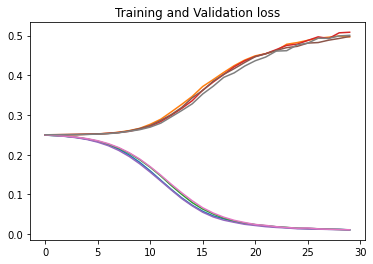

In [21]:
epochs = range(EPOCHS)
for i in range(4):
    loss = cnn_encoder_result[i]['loss']
    val_loss = cnn_encoder_result[i]['val_loss']
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Training and Validation loss')

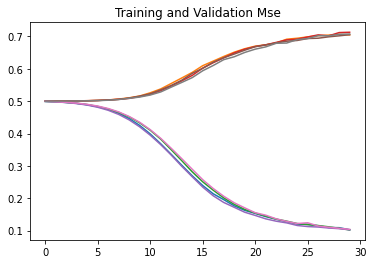

In [22]:
epochs = range(EPOCHS)
for i in range(4):
    mse = cnn_encoder_result[i]['root_mean_squared_error']
    val_mse = cnn_encoder_result[i]['val_root_mean_squared_error']
    plt.plot(mse)
    plt.plot(val_mse)
    plt.title('Training and Validation Mse')

In [23]:
cnn_enc_predict = autoencoder.predict(test_dataset, verbose = True)
cnn_enc_predict = cnn_enc_predict.reshape(-1)
prediction = np.array(cnn_enc_predict)

26/26 [==============================] - 1s 2ms/step


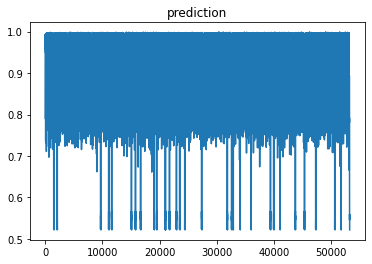

In [24]:
plt.title("prediction")
plt.plot(prediction)

array([[<AxesSubplot:title={'center':'cnn_result'}>]], dtype=object)

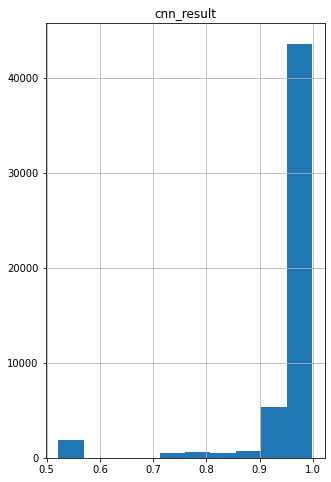

In [25]:
cnn_result = pd.DataFrame(prediction)
cnn_result.columns = ['cnn_result']
cnn_result.hist(figsize = (5,8),column= 'cnn_result')